# Support Vector Machine
# None Linear Separation
## CPE 490 590
## Rahul Bhadani

### Problem: Generate halfmoon dataset consisting of two class, implement support vector machine to separate them. Also create plot in matplotlib to visualize the maximum separation and support vectors.

## Generation Synethetic Dataset

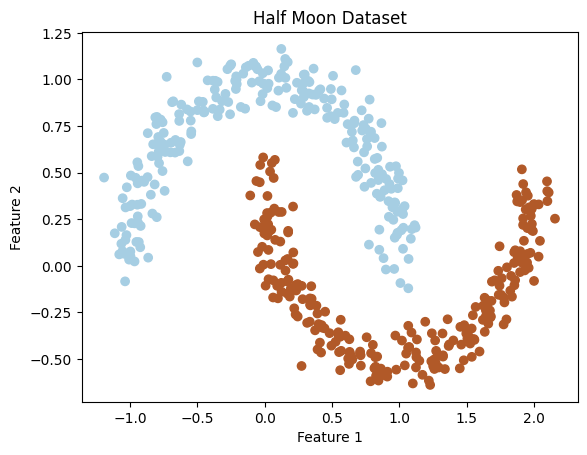

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons

# Generate the half moon dataset
X, y = make_moons(n_samples=500, noise=0.08, shuffle=False)

# Plot the dataset
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title("Half Moon Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


# Train a nonLinear SVM

We’ll use the Support Vector Machine (SVM) algorithm to classify the data. Scikit-learn provides different SVM classifiers, including SVC (for linear kernel), NuSVC, and LinearSVC. Additionally, we’ll explore three different kernel functions: polynomial, Gaussian (RBF), and sigmoid.

In [23]:
from sklearn.svm import SVC, NuSVC, LinearSVC

# Initialize SVM classifiers
clf_linear = SVC(kernel='linear')
clf_poly = SVC(kernel='poly', degree=4, coef0=1, C=5)
clf_rbf = SVC(kernel='rbf', gamma=5, C=0.001)
clf_sigmoid = SVC(kernel='sigmoid', coef0=0.3)

# Fit the classifiers to the data
clf_linear.fit(X, y)
clf_poly.fit(X, y)
clf_rbf.fit(X, y)
clf_sigmoid.fit(X, y)


SVC(coef0=0.3, kernel='sigmoid')

# Plot the decision function for linear seapration

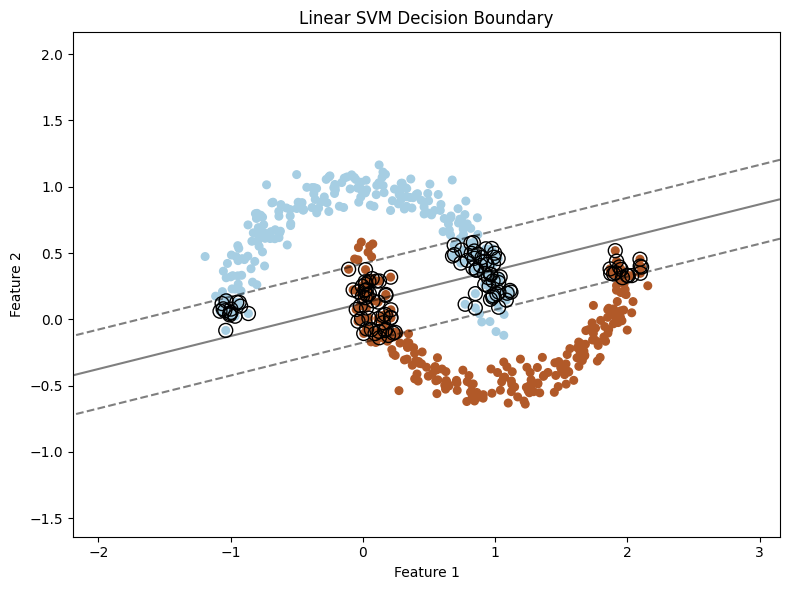

In [24]:
from sklearn.inspection import DecisionBoundaryDisplay
decision_function = clf_linear.decision_function(X)
support_vector_indices = np.where(np.abs(decision_function) <= 1 + 1e-15)
support_vectors = X[support_vector_indices]

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    clf_linear,
    X,
    ax=ax,
    grid_resolution=50,
    plot_method="contour",
    colors="k",
    levels=[-1, 0, 1],
    alpha=0.5,
    linestyles=["--", "-", "--"],
)
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], s=100, linewidth=1, facecolors="none", edgecolors="k")
plt.title("Linear SVM Decision Boundary")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.tight_layout()
plt.show()


# Plot the decision function for polynomial seapration

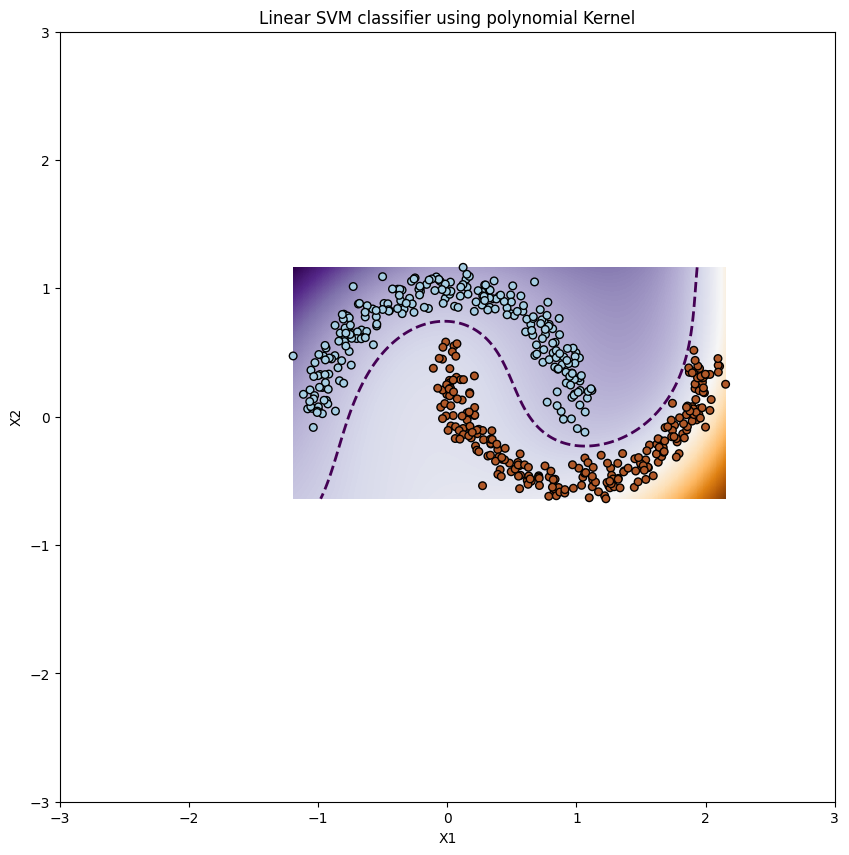

In [25]:
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 500),
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 500))

Z_poly = clf_poly.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_poly = Z_poly.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.imshow(
    Z_poly,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z_poly, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.axis([-3, 3, -3, 3])
plt.title('Linear SVM classifier using polynomial Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# Plot the decision function for RBF kernel

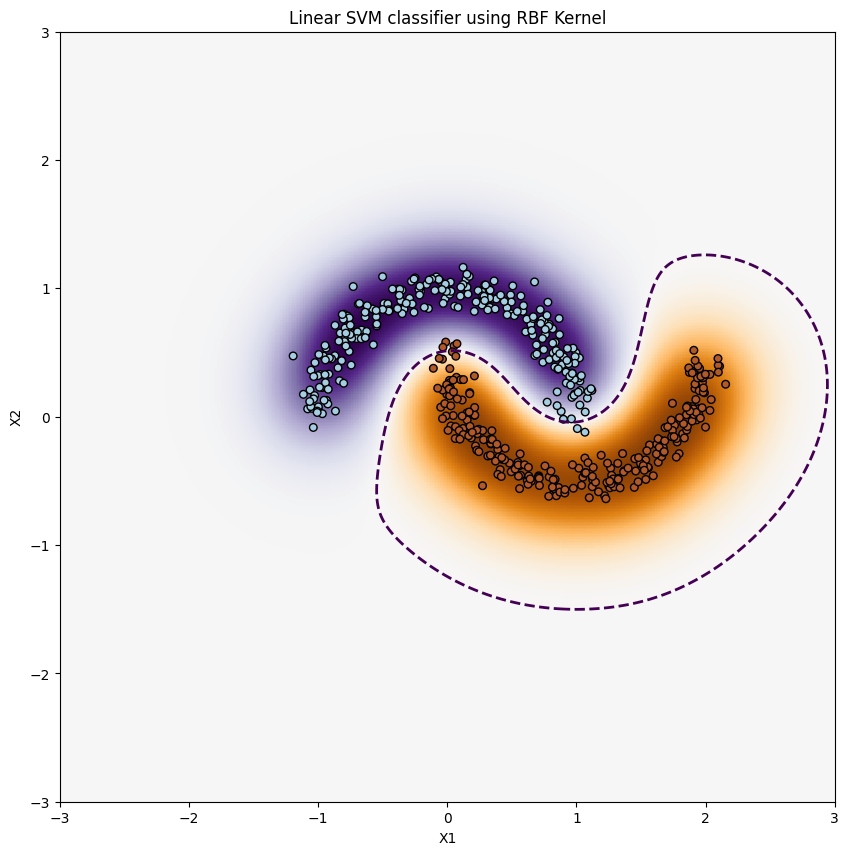

In [26]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)


Z_rbf = clf_rbf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_rbf = Z_rbf.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.imshow(
    Z_rbf,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z_rbf, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.axis([-3, 3, -3, 3])
plt.title('Linear SVM classifier using RBF Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


# Plot the decision function for Sigmoid kernel

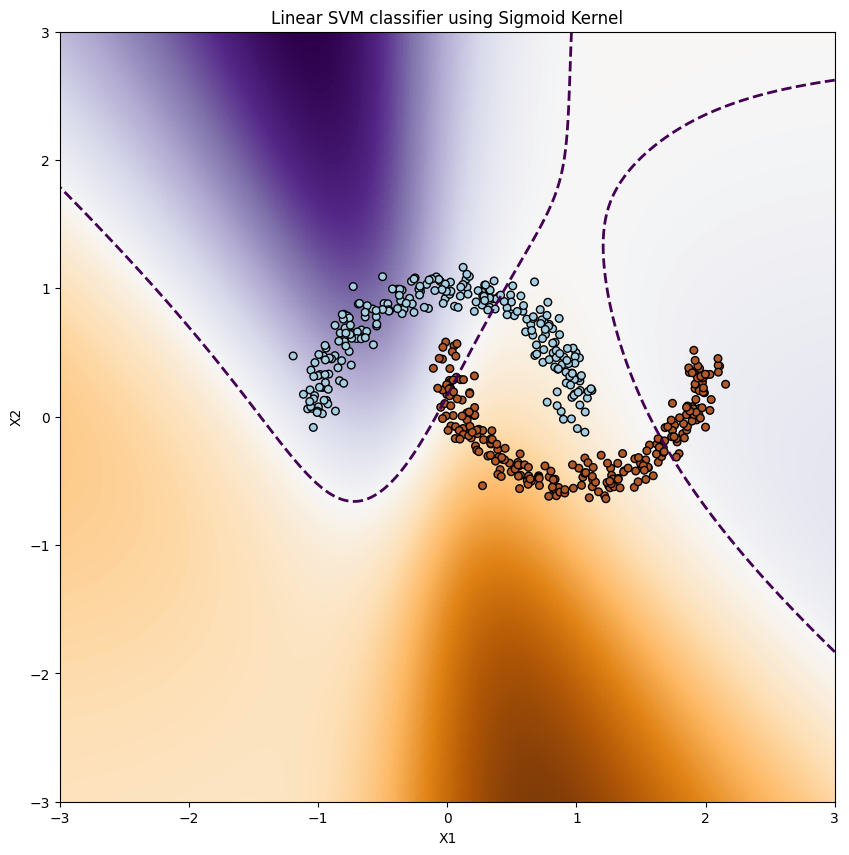

In [27]:
xx, yy = np.meshgrid(np.linspace(-3, 3, 500), np.linspace(-3, 3, 500))
np.random.seed(0)


Z_s = clf_sigmoid.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z_s = Z_s.reshape(xx.shape)

plt.figure(figsize=(10,10))
plt.imshow(
    Z_s,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    aspect="auto",
    origin="lower",
    cmap=plt.cm.PuOr_r,
)
contours = plt.contour(xx, yy, Z_s, levels=[0], linewidths=2, linestyles="dashed")
plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired, edgecolors="k")
plt.axis([-3, 3, -3, 3])
plt.title('Linear SVM classifier using Sigmoid Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
